In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_model():
    model = models.Sequential()

    # (1) INPUT: 32 × 32 × 1
    # Aggiungiamo uno strato di input con la forma richiesta
    model.add(layers.Input(shape=(32, 32, 1)))

    # (2) CONV5: 5 × 5 size, 32 filters, 1 stride
    model.add(layers.Conv2D(32, (5, 5), strides=(1, 1), activation='relu', padding='valid'))

    # (3) ReLU: max(0,hθ(x)) - Implementato automaticamente da `activation='relu'`

    # (4) POOL: 2 × 2 size, 1 stride
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

    # (5) CONV5: 5 × 5 size, 64 filters, 1 stride
    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1), activation='relu', padding='valid'))

    # (6) ReLU: max(0,hθ(x)) - Implementato automaticamente da `activation='relu'`

    # (7) POOL: 2 × 2 size, 1 stride
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

    # Flattening per passare ai livelli fully connected
    model.add(layers.Flatten())

    # (8) FC: 1024 Hidden Neurons
    model.add(layers.Dense(1024, activation='relu'))

    # (9) DROPOUT: p = 0.5
    model.add(layers.Dropout(0.5))

    # (10) FC: 10 Output Class
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Creiamo il modello
model = create_model()

# Mostriamo un sommario del modello
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    31,720,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,782,794 (121.24 MB)

 Trainable params: 31,782,794 (121.24 MB)

 Non-trainable params: 0 (0.00 B)

c:\Users\Noemi\anaconda31\Lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


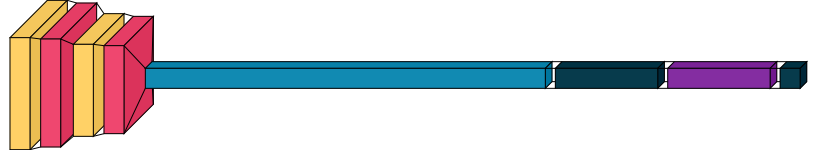

In [2]:
import visualkeras
visualkeras.layered_view(model)

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import math

def create_custom_model(input_size, N1, N2, N3, N4):
    """
    Args:
        input_size: Dimensione dell'input (S1 x S1)
        N1: Numero di feature maps nel primo layer
        N2: Numero di feature maps nel secondo layer
        N3: Numero di neuroni nello strato nascosto dell'MLP
        N4: Numero di classi di output
    Returns:
        Il modello compilato
    """

    # Calcolo delle dimensioni successive
    S2 = math.floor((input_size - 4) / 2)
    S3 = math.floor((S2 - 4) / 2)

    model = models.Sequential()

    # Input Layer: Normalizzato e centralizzato
    model.add(layers.Input(shape=(input_size, input_size, 1)))

    # Primo feature map layer (N1 feature maps, kernel 5x5, subsampling ratio 2)
    model.add(layers.Conv2D(N1, (5, 5), activation='relu', padding='valid'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Secondo feature map layer (N2 feature maps, kernel 5x5, subsampling ratio 2)
    model.add(layers.Conv2D(N2, (5, 5), activation='relu', padding='valid'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten per collegare ai livelli Fully Connected
    model.add(layers.Flatten())

    # Fully Connected Multi-Layer Perceptron (MLP)
    # Hidden layer con N3 neuroni
    model.add(layers.Dense(N3, activation='relu'))

    # Output layer con N4 neuroni
    model.add(layers.Dense(N4, activation='softmax'))

    return model

# Esempio di utilizzo
input_size = 32  # S1 = 32
N1 = 16  # Numero di feature maps nel primo livello
N2 = 32  # Numero di feature maps nel secondo livello
N3 = 128  # Numero di neuroni nello strato nascosto
N4 = 10  # Numero di classi di output

model = create_custom_model(input_size, N1, N2, N3, N4)

# Mostra il sommario del modello
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,066 (457.29 KB)

 Trainable params: 117,066 (457.29 KB)

 Non-trainable params: 0 (0.00 B)

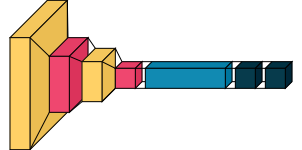

In [4]:
import visualkeras
visualkeras.layered_view(model)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_four_layer_cnn_fixed(input_size, num_classes):
    """
    Fixes the issue of negative output size by adjusting the architecture.

    Args:
        input_size: Dimension of the input (e.g., 32 for a 32x32 input image).
        num_classes: Number of output classes.

    Returns:
        Compiled CNN model.
    """
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=(input_size, input_size, 1)))

    # First convolutional layer: 5x5 kernel, zero-padding 2, stride 1
    model.add(layers.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu'))

    # Second convolutional layer: 5x5 kernel, zero-padding 2, stride 1
    model.add(layers.Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu'))

    # First max pooling: 4x4 kernel, stride 4
    model.add(layers.MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))

    # Third convolutional layer: 3x3 kernel, zero-padding 1, stride 1
    model.add(layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))

    # Second max pooling: 2x2 kernel, stride 2 (reduced pooling to avoid shrinking too much)
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fourth convolutional layer: 7x7 kernel, zero-padding 3, stride 1 (adjusted padding)
    model.add(layers.Conv2D(256, (7, 7), strides=(1, 1), padding='same', activation='relu'))

    # Third max pooling: 2x2 kernel, stride 2
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten before fully connected layer
    model.add(layers.Flatten())

    # Fully connected layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Example usage
input_size = 32  # Input dimensions (e.g., 32x32 image)
num_classes = 10  # Number of output classes

model = create_four_layer_cnn_fixed(input_size, num_classes)

# Model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 256)      │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,742,090 (6.65 MB)

 Trainable params: 1,742,090 (6.65 MB)

 Non-trainable params: 0 (0.00 B)

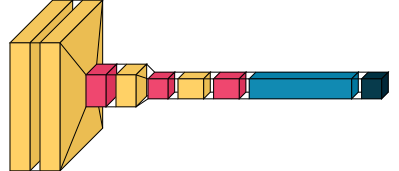

In [7]:
import visualkeras
visualkeras.layered_view(model)

In [8]:
import torch
import torch.nn as nn
import torchvision.models as models

# Carica il modello ResNet-34 pre-addestrato (se necessario)
model = models.resnet34(pretrained=True)

# Se vuoi utilizzare il modello senza pre-addestramento (inizializzazione casuale dei pesi)
# model = models.resnet34(pretrained=False)

# Modifica la rete per il tuo caso d'uso, ad esempio modificando l'ultimo layer per un numero specifico di classi
# Supponiamo di voler un classificatore con 10 classi
model.fc = nn.Linear(model.fc.in_features, 10)

# Se vuoi utilizzare il modello su una GPU
# model = model.cuda()




c:\Users\Noemi\anaconda31\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Noemi\anaconda31\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Noemi/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [13:31<00:00, 108kB/s]   


AttributeError: 'ResNet' object has no attribute 'summary'

In [10]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models

def resnet_block(x, filters, kernel_size=3, stride=1, conv_first=True):
    """Funzione per un singolo blocco ResNet"""
    if conv_first:
        x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding="same")(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
    
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=stride, padding="same")(x)
    x = layers.BatchNormalization()(x)
    
    return layers.add([x, x])  # Aggiungi la connessione residuale

def build_resnet34(input_shape):
    """Funzione per costruire la ResNet-34"""
    inputs = layers.Input(shape=input_shape)
    
    # Prima convoluzione e pooling
    x = layers.Conv2D(64, (7, 7), strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D((3, 3), strides=2, padding="same")(x)
    
    # Blocco ResNet-34
    x = resnet_block(x, 64)
    x = resnet_block(x, 128, stride=2)
    x = resnet_block(x, 256, stride=2)
    x = resnet_block(x, 512, stride=2)
    
    # Global Average Pooling e classificazione finale
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(1000, activation="softmax")(x)  # Modifica il numero di classi se necessario
    
    model = models.Model(inputs, x)
    
    return model

# Crea il modello ResNet-34
input_shape = (224, 224, 3)  # Ad esempio, immagini RGB 224x224
model = build_resnet34(input_shape)

# Visualizza il sommario del modello
model.summary()


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 112, 112,  │      9,472 │ input_layer_4[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 112, 112,  │        256 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 56, 56,    │          0 │ re_lu[0][0]       │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 56, 56,    │     36,928 │ max_pooling2d_9[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 56, 56,    │     36,928 │ re_lu_1[0][0]     │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ conv2d_14[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 28, 28,    │     73,856 │ add[0][0]         │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 28, 28,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 14, 14,    │    147,584 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 14, 14,    │        512 │ conv2d_16[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 14, 14,    │          0 │ batch_normalizat

 Total params: 5,250,920 (20.03 MB)

 Trainable params: 5,246,952 (20.02 MB)

 Non-trainable params: 3,968 (15.50 KB)

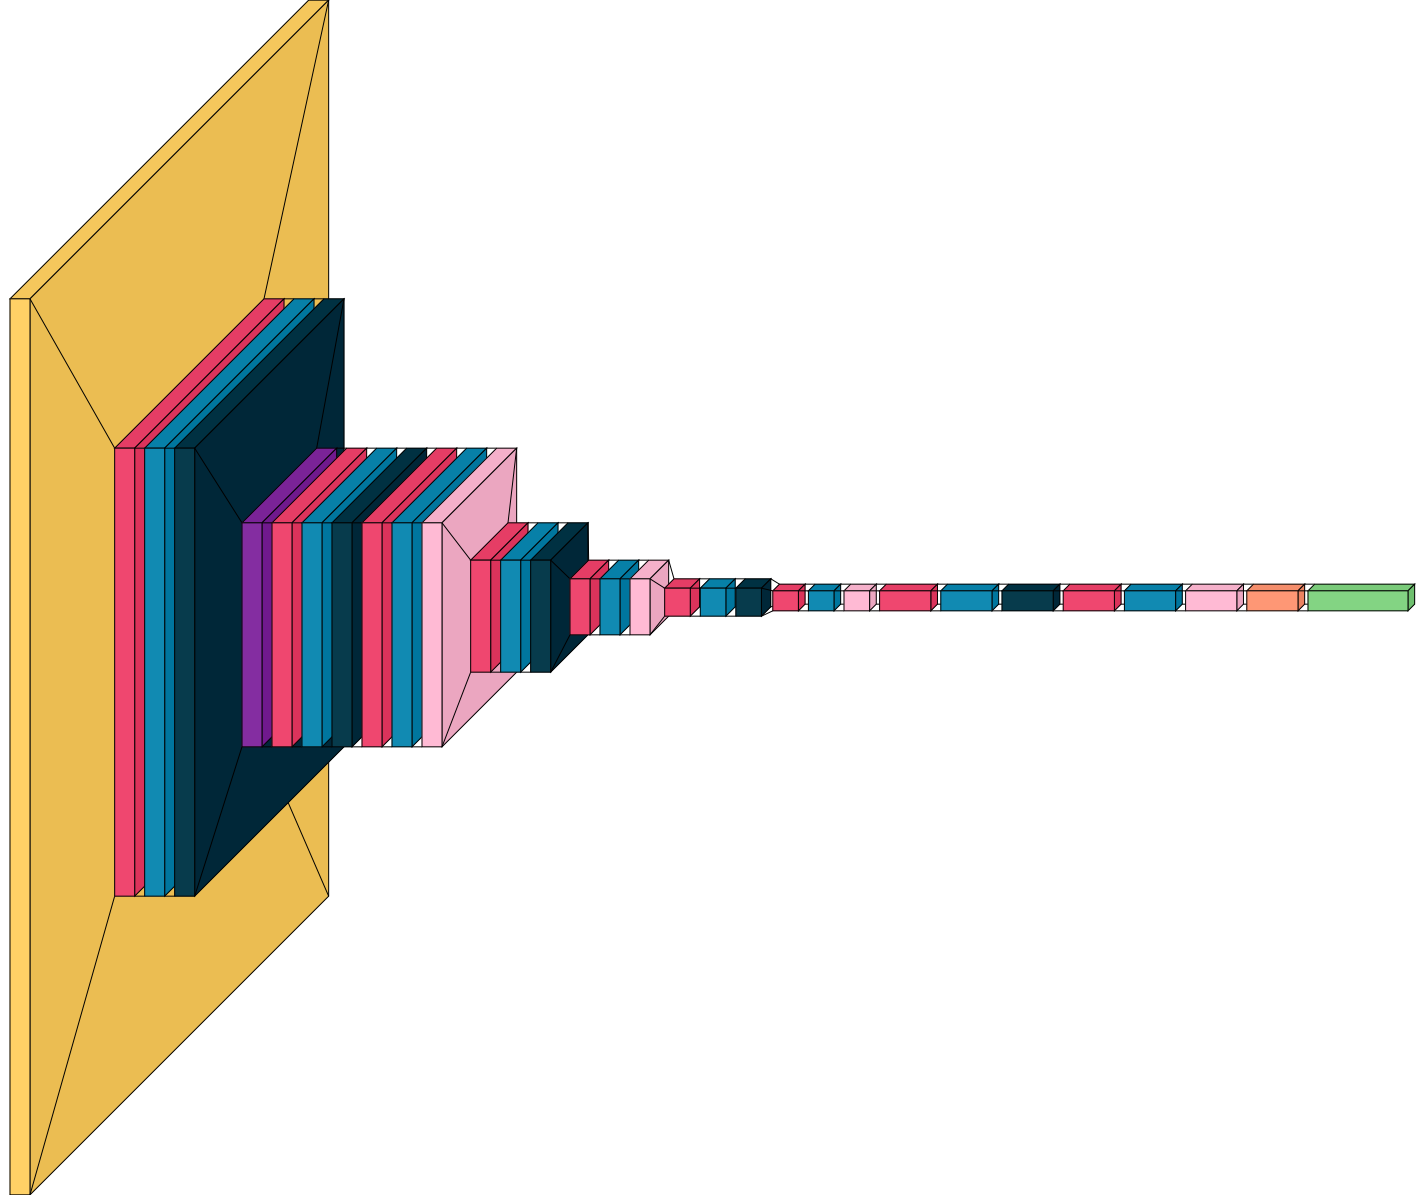

In [18]:
import visualkeras
visualkeras.layered_view(model)